In [1]:
import struct
import matplotlib.pyplot as plt
import numpy as np

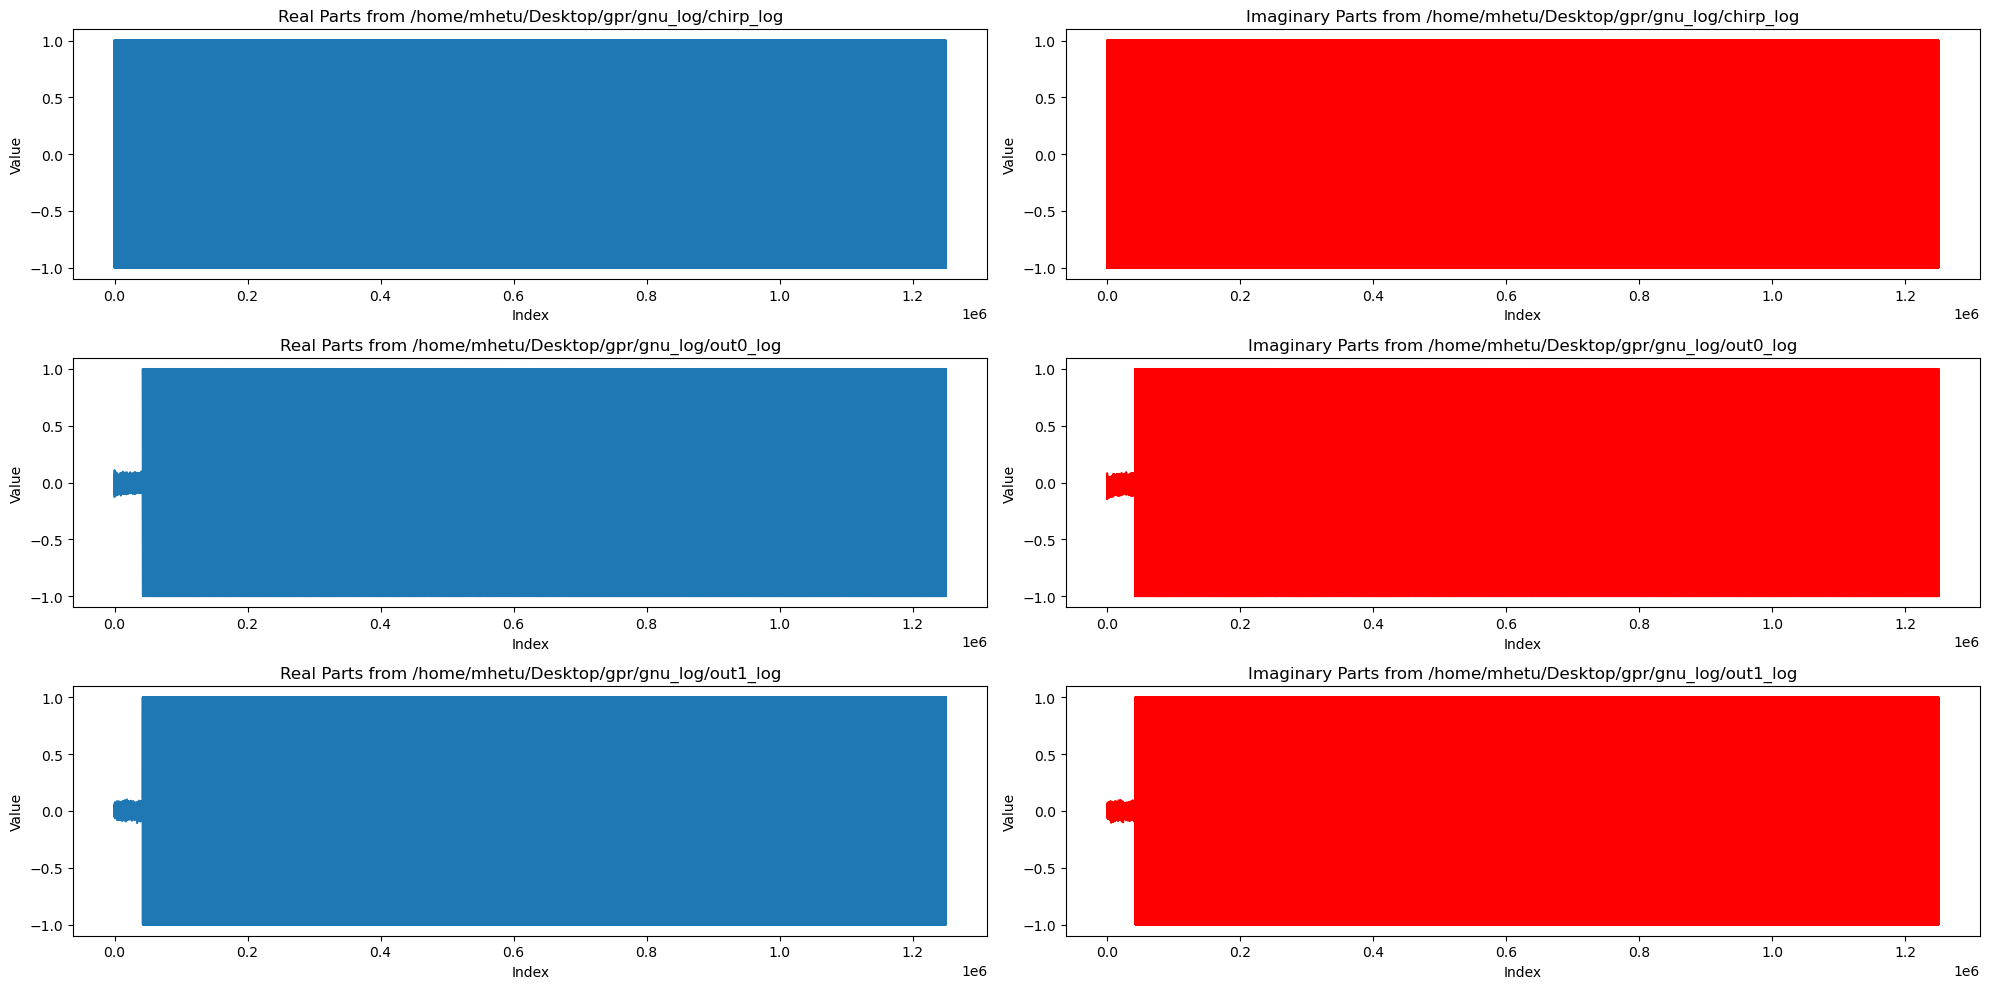

In [2]:
# List of file names
file_names = ["/home/mhetu/Desktop/gpr/gnu_log/chirp_log", "/home/mhetu/Desktop/gpr/gnu_log/out0_log", "/home/mhetu/Desktop/gpr/gnu_log/out1_log"]

# Create a new figure
plt.figure(figsize=(20, 10))

for i, file_name in enumerate(file_names, 1):
    with open(file_name, "rb") as file:
        data = file.read(10000000)

    # Number of complex numbers = total bytes / bytes per complex number
    num_complex_numbers = len(data) // 8
    floats = struct.unpack(f'<{2*num_complex_numbers}f', data)

    # Separate the real and imaginary parts
    real_parts = floats[::2]
    imaginary_parts = floats[1::2]

    #real_parts = real_parts[1200000:1200900]
    #imaginary_parts = imaginary_parts[1200000:1250900]

    # Create a subplot for each file and plot real and imaginary parts
    plt.subplot(len(file_names), 2, 2*i-1)
    plt.plot(real_parts, label='Real')
    plt.title(f'Real Parts from {file_name}')
    plt.xlabel('Index')
    plt.ylabel('Value')

    plt.subplot(len(file_names), 2, 2*i)
    plt.plot(imaginary_parts, label='Imaginary', color='red')
    plt.title(f'Imaginary Parts from {file_name}')
    plt.xlabel('Index')
    plt.ylabel('Value')

# Ensure a clean layout
plt.tight_layout()

# Display the plots
plt.show()

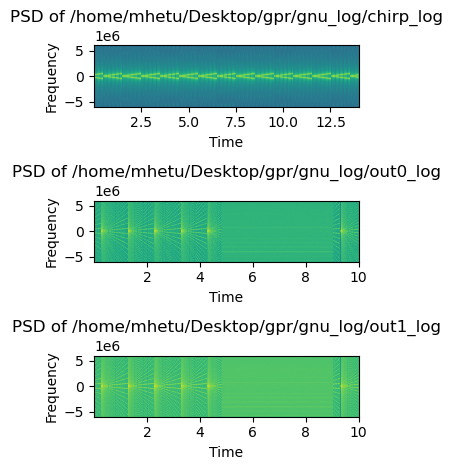

In [3]:
for i, file_name in enumerate(file_names, 1):
    
    dat = np.fromfile(open(file_name), dtype="complex64")

    # Create a subplot for each file
    plt.subplot(len(file_names), 2, 2*i-1)
    plt.specgram(dat, NFFT=1024, Fs=12000000)
    plt.title(f"PSD of {file_name}")
    plt.xlabel("Time")
    plt.ylabel("Frequency")

# Ensure a clean layout
plt.tight_layout()

# Display the plots
plt.show()
